# Промежуточная аттестация по сетям искусcтвенных нейронов.
## Задание

**Ваша задача - создать классификатор изображений с помощью Keras и сверточных нейронных сетей для набора данных Fashion MNIST. Этот набор данных включает 10 меток с разными типами одежды с изображениями 28 на 28 * в оттенках серого *. Имеется обучающий набор из 60 000 изображений и 10 000 тестовых изображений.**

Описание классов

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## Данные

**Загружаем данные**

In [136]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [137]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

## Визаулизация датасета

**Используйте matplotlib чтобы показать пример картинки.**

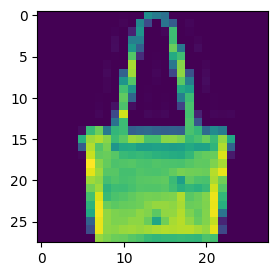

In [138]:
random_index = np.random.randint(0, len(x_train))
random_image = x_train[random_index]
plt.figure(figsize=(3, 3))
plt.imshow(random_image)  
plt.show()

## Предобработка

**Нормализуйте данные X_train и X_test **

In [139]:
mean = np.mean(x_train)
std = np.std(x_train)

# Нормализуем x_train и x_test
x_train_normalized = (x_train - mean) / std
x_test_normalized = (x_test - mean) / std

**Измените форму массивов X_train и X_test так, чтобы они стали 4-мерными**
batch_size x channels x H x W

In [140]:
H, W, channels = 28, 28, 1

# Изменяем форму массивов X_train и X_test
X_train_reshaped = x_train_normalized.reshape(-1, channels, H, W)
X_test_reshaped = x_test_normalized.reshape(-1, channels, H, W)

**Преобразуйте  y_train и y_test в one_hot представления **

In [141]:
from keras.utils import to_categorical

# Преобразование y_train и y_test в one-hot представления
num_classes = 10  

y_train_one_hot = to_categorical(y_train, num_classes)
y_test_one_hot = to_categorical(y_test, num_classes)

## Создайте модель

**Примерная структура модели. При выполнении задания вы можете поэкспериментировать со слоями**

* Сверточный слой, 32 фильтра, размер ядра=(4,4)
* Пулинг с pool_size = (2,2)

* Выпрямляющий слой (Flatten)
* Полносвязный слой (например 128 нейронов), RELU 

* Выходной полносвязный слой с 10 нейронами с softmax 

**При компиляции укажите loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [142]:

#  Создаем модель
model = Sequential()

# 32 фильтра, размер ядра (4,4)
model.add(Conv2D(32, (4, 4), activation='relu', input_shape=(28, 28, 1)))

# cлой пулинга 
model.add(MaxPooling2D(pool_size=(2, 2)))

# слой выравнивания
model.add(Flatten())

# полносвязный слой
model.add(Dense(128, activation='relu'))

# выходной слой 
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model.summary()

# Сохраним веса на слое Conv2d
initial_filters = model.layers[0].get_weights()[0]


Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 4608)              0         
                                                                 
 dense_22 (Dense)            (None, 128)               589952    
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_______________________________________________

### Тренировка модели
**Тренируем модель на x_train. Число эпох выберите самостоятельно**

In [143]:
num_epochs = 10
history = model.fit(x_train_normalized, y_train_one_hot, epochs=num_epochs, batch_size=64, validation_split=0.2)


Epoch 1/10
750/750 [==============================] - 12s 15ms/step - loss: 0.4306 - accuracy: 0.8464 - val_loss: 0.3516 - val_accuracy: 0.8749
Epoch 2/10
750/750 [==============================] - 12s 15ms/step - loss: 0.2869 - accuracy: 0.8963 - val_loss: 0.3131 - val_accuracy: 0.8809
Epoch 3/10
750/750 [==============================] - 11s 15ms/step - loss: 0.2393 - accuracy: 0.9128 - val_loss: 0.2700 - val_accuracy: 0.9062
Epoch 4/10
750/750 [==============================] - 11s 15ms/step - loss: 0.2072 - accuracy: 0.9242 - val_loss: 0.3084 - val_accuracy: 0.8909
Epoch 5/10
750/750 [==============================] - 12s 15ms/step - loss: 0.1805 - accuracy: 0.9348 - val_loss: 0.2816 - val_accuracy: 0.9040
Epoch 6/10
750/750 [==============================] - 12s 16ms/step - loss: 0.1585 - accuracy: 0.9417 - val_loss: 0.2984 - val_accuracy: 0.9028
Epoch 7/10
750/750 [==============================] - 12s 16ms/step - loss: 0.1380 - accuracy: 0.9496 - val_loss: 0.3085 - val_accuracy:

### Оценка модели

**Оцените модель по метрикам accuracy,precision,recall,f1-score на тестовой выборке x_test **

In [144]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Получаем предсказанные метки для тестовых данных
y_pred_one_hot = model.predict(x_test_normalized)

# Преобразуем one-hot представление в обычные метки (индексы классов)
y_pred = np.argmax(y_pred_one_hot, axis=1)
y_true = np.argmax(y_test_one_hot, axis=1)


accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')


print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')


313/313 [==============================] - 1s 3ms/step
Accuracy: 0.9044
Precision: 0.9053182487501259
Recall: 0.9044
F1-Score: 0.9033289518362161


## Дополнительно
 
* Отрисуйте фильтры на слое Conv2D, сравните до и после обучения модели

In [147]:
def draw_filters(filters, title):
    # filters , bias = model.layers[1].get_weights()
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    
    plt.figure(figsize=(6, 6))
    for i in range(filters.shape[-1]):
        plt.subplot(8, 8, i + 1)
        plt.imshow(filters[:, :, 0, i],cmap="gray")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

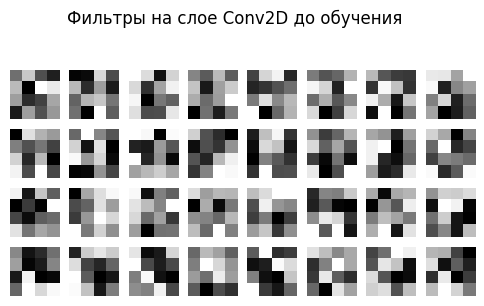

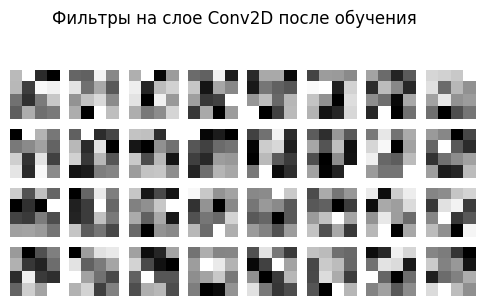

In [148]:
draw_filters(initial_filters, "Фильтры на слое Conv2D до обучения")

trained_filters = model.layers[0].get_weights()[0]
draw_filters(trained_filters, "Фильтры на слое Conv2D после обучения")